<a href="https://colab.research.google.com/github/safranco8/ayvd-entregables-grupo-31/blob/main/AEyC/03_05_22_entregable_parte_1_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
#010 Instalamos librería necesaria 
!pip install python-decouple

In [2]:
#020 Importamos las librerías necesarias.

import matplotlib.pyplot as plt
import numpy
import pandas as pd

import seaborn
seaborn.set_context('talk')

from decouple import config
from sqlalchemy import create_engine, text

In [3]:
#030 Importamos la librería plotly 
import plotly
plotly.__version__
# Make sure it's 4.14.3
pd.options.display.float_format = '{:,.2f}'.format

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



#Ejercicio 1 punto 1
Crear una base de datos en SQLite utilizando la libreria SQLalchemy. https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite



In [4]:
#040 Creamos una base de datos en SQLite utilizando la libreria SQLalchemy.  Melbourne, Australia
from sqlalchemy import create_engine, text
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

#Ejercicio 1 punto 2
Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

**Implemntado en el punto #040 y como resultado se crea el dataframe melb_df** 

In [5]:
#050 Cargamos el conjunto de datos de la compentencia Kaggle sobre estimación de precios de ventas de propiedades en Melbourne, Australia.
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,"1,480,000.00",S,Biggin,3/12/2016,2.50,"3,067.00",...,1.00,1.00,202.00,NaN,NaN,Yarra,-37.80,145.00,Northern Metropolitan,"4,019.00"
1,Abbotsford,25 Bloomburg St,2,h,"1,035,000.00",S,Biggin,4/02/2016,2.50,"3,067.00",...,1.00,0.00,156.00,79.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"
2,Abbotsford,5 Charles St,3,h,"1,465,000.00",SP,Biggin,4/03/2017,2.50,"3,067.00",...,2.00,0.00,134.00,150.00,"1,900.00",Yarra,-37.81,144.99,Northern Metropolitan,"4,019.00"


In [6]:
#060 Verificamos los cuales son los suburbios
melb_df["Suburb"].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

In [7]:
#070 Convertimos nuestro dataframe en una base de datos en SQL
melb_df.to_sql('Melbourne', con=engine, if_exists="replace")

2022-05-03 22:38:01,299 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Melbourne")
2022-05-03 22:38:01,302 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-03 22:38:01,308 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Melbourne")
2022-05-03 22:38:01,312 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-03 22:38:01,325 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-03 22:38:01,327 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Melbourne" (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-05-03 22:38:01,329 INFO sqlalchemy.engine.Engine [no key 0.00157s] ()
2022-05-03 22:38:01,345 INFO sql

In [8]:
#080 Verificamos cuales son las columnas de Airbnb
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv')
print(airbnb_df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'neighborhood_overview', 'notes', 'transit',
       'access', 'interaction', 'house_rules', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighborhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
#090 Cargamos una base de datos  de airbnb
# data source:
# https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'suburb', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price',
  'latitude', 'longitude', 'review_scores_rating'
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

#print(melb_df.columns)
#print(airbnb_df.columns)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
#100 Convertimos nuestro dataframe en una base de datos en SQL
airbnb_df.to_sql('Airbnb', con=engine, if_exists="replace")

2022-05-03 22:38:17,119 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")
2022-05-03 22:38:17,122 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-03 22:38:17,126 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("Airbnb")
2022-05-03 22:38:17,129 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-03 22:38:17,146 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-03 22:38:17,151 INFO sqlalchemy.engine.Engine 
CREATE TABLE "Airbnb" (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT, 
	review_scores_rating FLOAT
)


2022-05-03 22:38:17,153 INFO sqlalchemy.engine.Engine [no key 0.00291s] ()
2022-05-03 22:38:17,170 INFO sqlalchemy.engine.Engine CREATE INDEX "ix_Airbnb_index" ON "Airbnb" ("index")
2022-05-03 22:38:17,173 INFO sqlalchemy.engine.Engine [no key 0.0027

#Ejercicio 1 punto 3

Implementar consultas en SQL que respondan con la siguiente información:

cantidad de registros totales por ciudad.
cantidad de registros totales por barrio y ciudad.

In [11]:
#110 Creamos funciones para ejecutar las queries
def execute_print_sql(list_of_sql_sentences):
    with engine.connect() as con:
        for query in list_of_sql_sentences:
            rs = con.execute(query)
            print(query)
            for row in rs:
                print(row)
            print('\n\n')

def execute_sql(query):
    with engine.connect() as con:
        rs = con.execute(query)
        return rs           

In [12]:
#120 cantidad de registros totales por codigo postal y por Suburbios en tabla Melbourne.
query1 = "SELECT Postcode, COUNT(1) FROM Melbourne GROUP BY Postcode"
query2 = "SELECT Postcode, Suburb, COUNT(1) FROM Melbourne GROUP BY Postcode, Suburb"
queries = [query1, query2]

In [13]:
#130 Implementamos las consultas SQL en la base de datos Melbourne
execute_print_sql(queries)

2022-05-03 22:38:19,406 INFO sqlalchemy.engine.Engine SELECT Postcode, COUNT(1) FROM Melbourne GROUP BY Postcode
2022-05-03 22:38:19,408 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT Postcode, COUNT(1) FROM Melbourne GROUP BY Postcode
(3000.0, 46)
(3002.0, 22)
(3003.0, 31)
(3006.0, 41)
(3008.0, 3)
(3011.0, 194)
(3012.0, 242)
(3013.0, 164)
(3015.0, 188)
(3016.0, 126)
(3018.0, 80)
(3019.0, 46)
(3020.0, 306)
(3021.0, 55)
(3022.0, 3)
(3023.0, 37)
(3024.0, 4)
(3025.0, 56)
(3027.0, 2)
(3028.0, 9)
(3029.0, 53)
(3030.0, 68)
(3031.0, 179)
(3032.0, 236)
(3033.0, 121)
(3034.0, 74)
(3036.0, 9)
(3037.0, 36)
(3038.0, 39)
(3039.0, 149)
(3040.0, 290)
(3041.0, 91)
(3042.0, 171)
(3043.0, 57)
(3044.0, 171)
(3046.0, 284)
(3047.0, 54)
(3048.0, 21)
(3049.0, 15)
(3051.0, 81)
(3052.0, 31)
(3053.0, 51)
(3054.0, 53)
(3055.0, 110)
(3056.0, 222)
(3057.0, 88)
(3058.0, 246)
(3059.0, 17)
(3060.0, 102)
(3061.0, 4)
(3064.0, 62)
(3065.0, 59)
(3066.0, 65)
(3067.0, 56)
(3068.0, 150)
(3070.0, 188)
(3071.0, 139)
(3072.

In [14]:
#140 cantidad de registros totales por codigo postal en la base de datos Airbnb
# cantidad de registros totales por ciudad y por barrio en la base de datos Airbnb.

query3 = "SELECT city, COUNT(1) FROM Airbnb GROUP BY city"
query4 ="SELECT city, neighborhood, COUNT(1) FROM Airbnb GROUP BY city, neighborhood"
queries = [query3, query4]

In [15]:
#150 Implementamos las consultas SQL en la base de datos Airbnb
execute_print_sql(queries)

2022-05-03 22:38:19,595 INFO sqlalchemy.engine.Engine SELECT city, COUNT(1) FROM Airbnb GROUP BY city
2022-05-03 22:38:19,606 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, COUNT(1) FROM Airbnb GROUP BY city
('Banyule', 203)
('Bayside', 375)
('Boroondara', 664)
('Brimbank', 108)
('Cardinia', 123)
('Casey', 153)
('Darebin', 698)
('Frankston', 177)
('Glen Eira', 631)
('Greater Dandenong', 147)
('Hobsons Bay', 239)
('Hume', 170)
('Kingston', 309)
('Knox', 175)
('Manningham', 313)
('Maribyrnong', 436)
('Maroondah', 115)
('Melbourne', 7368)
('Melton', 95)
('Monash', 571)
('Moonee Valley', 344)
('Moreland', 967)
('Nillumbik', 88)
('Port Phillip', 2808)
('Stonnington', 1621)
('Whitehorse', 614)
('Whittlesea', 137)
('Wyndham', 426)
('Yarra', 2049)
('Yarra Ranges', 771)



2022-05-03 22:38:19,678 INFO sqlalchemy.engine.Engine SELECT city, neighborhood, COUNT(1) FROM Airbnb GROUP BY city, neighborhood
2022-05-03 22:38:19,686 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT city, neighb

#Ejercicio 1 punto 4
Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.

In [16]:
#160 Ejecutamos consulta SQL para obtener los promedios de las variables relevantes
print(airbnb_df.columns)


airbnb_agg ="""SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*)
                  FROM Airbnb GROUP BY int_zipcode"""

execute_print_sql([airbnb_agg])


Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price', 'review_scores_rating'],
      dtype='object')
2022-05-03 22:38:19,824 INFO sqlalchemy.engine.Engine SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*)
                  FROM Airbnb GROUP BY int_zipcode
2022-05-03 22:38:19,835 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                    

In [17]:
#170 Join entre Melb y airbnb[interesting_cols]

sales_airbnb_join ="""
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*) as zipcode_count
                  FROM Airbnb GROUP BY int_zipcode)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          avg_review_scores_rating,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode"""

execute_print_sql([sales_airbnb_join])

Se truncaron las últimas líneas 5000 del resultado de transmisión.
(8583, 'Carlton', '2/100 Keppel St', 2, 't', 960000.0, 'VB', 'Nelson', '20/05/2017', 1.8, 3053.0, 2.0, 2.0, 1.0, 0.0, 90.0, 1860.0, 'Melbourne', -37.7947, 144.9724, 'Northern Metropolitan', 6786.0, 111.77, 3205.32, 923.51, 92.61, 538)
(8584, 'Carlton', '11/108 Elgin St', 2, 'u', 995000.0, 'S', 'Woodards', '22/04/2017', 1.8, 3053.0, 2.0, 2.0, 1.0, 0.0, 110.0, 2000.0, 'Melbourne', -37.7973, 144.9712, 'Northern Metropolitan', 6786.0, 111.77, 3205.32, 923.51, 92.61, 538)
(8585, 'Carlton', '20/264 Drummond St', 1, 'u', 490000.0, 'S', 'hockingstuart', '29/04/2017', 1.8, 3053.0, 1.0, 1.0, 1.0, 0.0, 51.0, 2009.0, 'Melbourne', -37.7998, 144.9689, 'Northern Metropolitan', 6786.0, 111.77, 3205.32, 923.51, 92.61, 538)
(8586, 'Carlton', '10/3 Lytton St', 2, 'u', 500000.0, 'VB', 'Peter', '29/04/2017', 1.8, 3053.0, 2.0, 1.0, 1.0, 4076.0, None, None, 'Melbourne', -37.7941, 144.9678, 'Northern Metropolitan', 6786.0, 111.77, 3205.32, 923

## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

#Ejercicio 2 punto 1

Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.


**Columnas relevantes**

**Melbourne**
  
Suburb, Address, Rooms, Type,	Price,	Date,	Distance,	Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount

**Airbnb**

description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, price, weekly_price, monthly_price, latitude, longitude,review_scores_rating

**Columnas descartadas**

**Melbourne**

index, Method, SellerG

In [18]:
#180 Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.
price_avg= """
select Price from Melbourne
"""
price_avg_df = pd.read_sql_query(price_avg, engine).dropna()
price_limit = price_avg_df["Price"].quantile(0.95)

#Eliminar los valores errones de código postal


2022-05-03 22:38:23,869 INFO sqlalchemy.engine.Engine 
select Price from Melbourne

2022-05-03 22:38:23,886 INFO sqlalchemy.engine.Engine [raw sql] ()


#Ejercicio 2 punto 2

Agregar información adicional respectiva al entorno de una propiedad a partir del conjunto de datos de AirBnB utilizado en el práctico.

1.   Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.




count      13,580.00
mean    1,075,684.08
std       639,310.72
min        85,000.00
25%       650,000.00
50%       903,000.00
75%     1,330,000.00
max     9,000,000.00
Name: Price, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


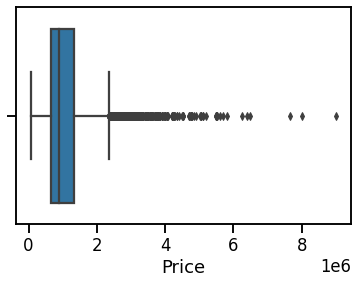

In [19]:
#190 Cantidad de filas por zipcode

print(price_avg_df["Price"].describe())
seaborn.boxplot(price_avg_df["Price"])

2022-05-03 22:38:24,715 INFO sqlalchemy.engine.Engine 
select cast(zipcode as int) as zipcode, count(zipcode) as count 
  from Airbnb 
  group by zipcode

2022-05-03 22:38:24,742 INFO sqlalchemy.engine.Engine [raw sql] ()
count     463.00
mean       49.14
std       147.48
min         1.00
25%         5.00
50%        15.00
75%        40.00
max     2,491.00
Name: count, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


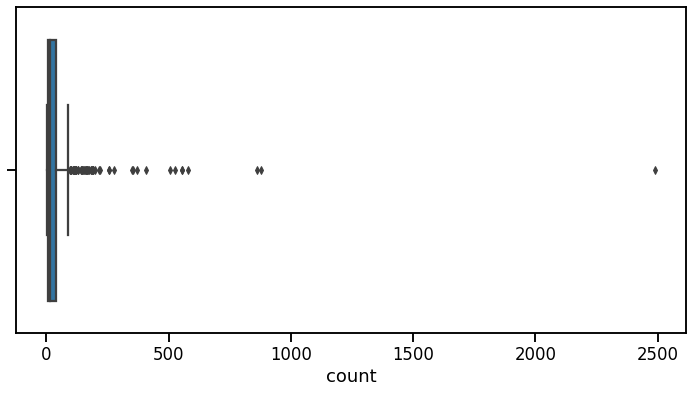

In [20]:
#200 Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
zipcode_count ="""
select cast(zipcode as int) as zipcode, count(zipcode) as count 
  from Airbnb 
  group by zipcode
"""
  #having count(zipcode) < 1000
zipcode_count_df = pd.read_sql_query(zipcode_count, engine).dropna()
print(zipcode_count_df["count"].describe())

plt.figure(figsize=(12, 6))
seaborn.boxplot(zipcode_count_df["count"])


In [35]:
#210
"""
Join entre Melb y airbnb[interesting_cols] con filtros para cantidad de 
registros por zipcode (right) y límite de precios (left)
"""
filtered_join ="""
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*) as zipcode_count
                  FROM Airbnb 
                  GROUP BY int_zipcode
                  HAVING zipcode_count > 4)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          avg_review_scores_rating,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.int_zipcode
                  WHERE m.Price < """ + str(price_limit)

df = pd.read_sql(filtered_join, engine)
df.to_csv("melb_data_extended.csv", index=None)
from google.colab import files
files.download('melb_data_extended.csv')

2022-05-03 22:53:09,921 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("
                  WITH airbnb_agg as 
                  (SELECT cast(zipcode as int) as int_zipcode, 
                          ROUND(AVG(price), 2) as avg_price, 
                          ROUND(AVG(monthly_price), 2) as avg_monthly_price,
                          ROUND(AVG(weekly_price), 2) as avg_weekly_price,
                          ROUND(AVG(review_scores_rating), 2) as avg_review_scores_rating,
                          COUNT(*) as zipcode_count
                  FROM Airbnb 
                  GROUP BY int_zipcode
                  HAVING zipcode_count > 4)

                  SELECT  m.*, 
                          avg_price,
                          avg_monthly_price,
                          avg_weekly_price,
                          avg_review_scores_rating,
                          zipcode_count
                  FROM Melbourne m 
                  left join airbnb_agg a on m.Postcode == a.i

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

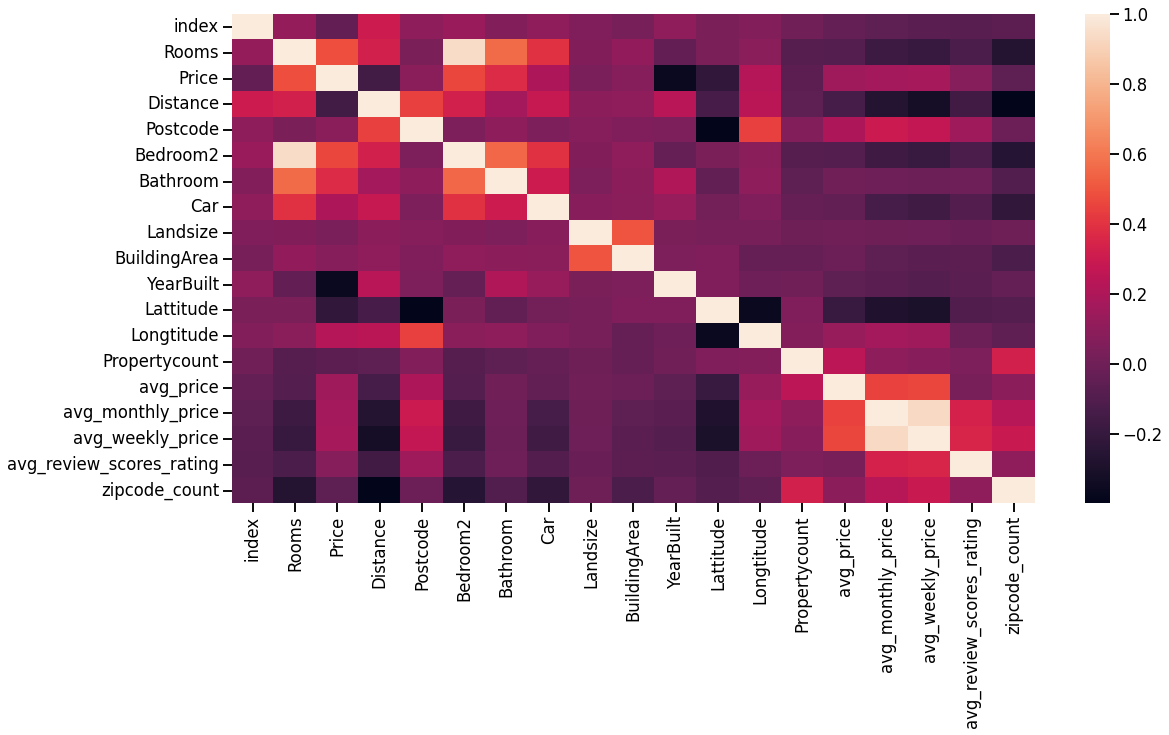

In [29]:
plt.figure(figsize=(18, 9))
seaborn.heatmap(df.corr());

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Lattitude,Longtitude,Regionname,Propertycount,avg_price,avg_monthly_price,avg_weekly_price,avg_review_scores_rating,zipcode_count,avg_weekly_price_q
1773,1926,Coburg,35 The Grove,8,u,"2,250,000.00",PI,Peter,4/03/2017,7.80,...,-37.75,144.97,Northern Metropolitan,"11,204.00",103.11,"3,624.17",896.06,94.88,133.00,"(868.15, 920.08]"
3024,3255,Heidelberg Heights,478 Waterdale Rd,8,h,"770,000.00",VB,Miles,19/11/2016,10.50,...,-37.74,145.05,Eastern Metropolitan,"2,947.00",83.66,937.50,291.43,94.00,38.00,"(197.5, 306.67]"
3976,4285,Newport,487 Melbourne Rd,8,h,"881,000.00",S,Jas,30/07/2016,8.40,...,-37.84,144.88,Western Metropolitan,"5,498.00",132.05,"2,002.33",706.12,95.29,65.00,"(658.33, 706.12]"
5846,6201,Templestowe Lower,40 Ironbark Dr,8,h,"1,150,000.00",PI,Barry,4/06/2016,13.80,...,-37.77,145.12,Eastern Metropolitan,"5,420.00",228.26,"1,400.00",350.00,90.31,19.00,"(306.67, 351.0]"
7169,7581,Brighton East,22 Milliara Gr,8,h,"1,880,000.00",VB,Buxton,13/05/2017,10.70,...,-37.91,145.02,Southern Metropolitan,"6,938.00",193.87,"1,116.00",376.88,93.35,53.00,"(351.0, 379.31]"
10066,10611,Camberwell,1088 Toorak Rd,8,h,"2,200,000.00",PI,Ross,8/07/2017,7.70,...,-37.85,145.07,Southern Metropolitan,"8,920.00",138.56,"2,742.57",526.67,96.17,88.00,"(525.43, 553.15]"
12570,13226,Meadow Heights,13 Haddon Ct,8,h,"741,000.00",S,Barry,23/09/2017,17.40,...,-37.66,144.93,Northern Metropolitan,"4,704.00",NaN,NaN,NaN,NaN,NaN,NaN


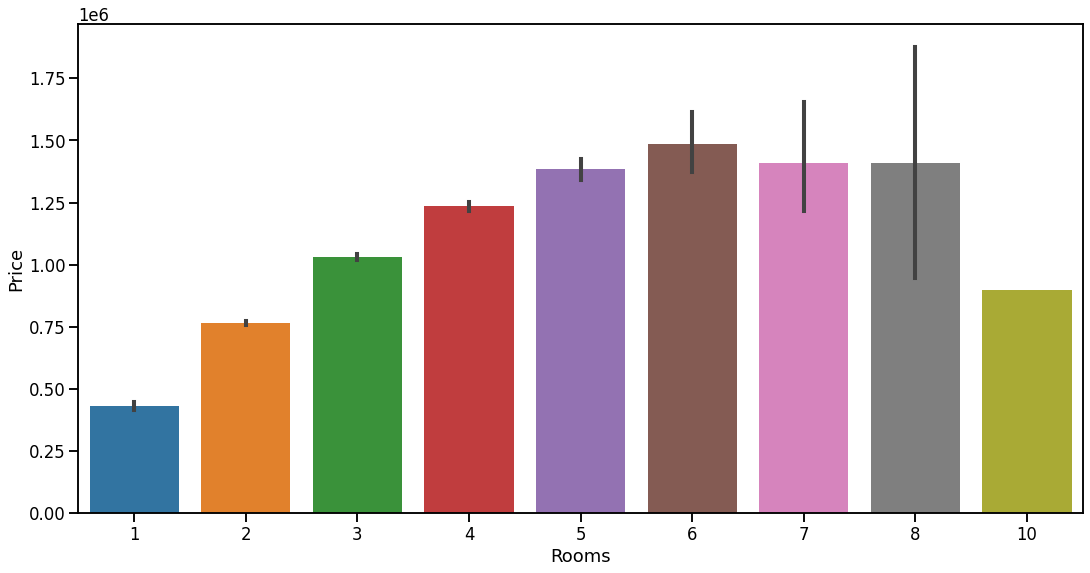

In [60]:

plt.figure(figsize=(18, 9))
yb = df[(df["avg_weekly_price"] > 1800) & (df["YearBuilt"] < 2022)]
df["avg_weekly_price_q"] = pd.qcut(df['avg_weekly_price'], 30,duplicates="drop")
#seaborn.barplot(data=df,x="avg_weekly_price_q",y="Price")

seaborn.barplot(data=df, x="Rooms", y="Price")
df[df["Rooms"]==8]

#Ejercicio 2 punto 3

Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. NO es necesario que realicen la implementación.

In [ ]:
#220



## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)